In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import nltk
import utils

In [2]:
%matplotlib inline

In [3]:
stemmed_keywords = utils.get_stemmed_keywords()

In [4]:
#suas = utils.load_json_as_dict(utils.with_elections_fname)

In [5]:
#utils.enrich_suas_with_topic_frequencies(suas, stemmed_keywords)

In [6]:
#utils.save_as_json(utils.suas_with_topic_frequencies, suas)

In [17]:
df = pd.read_json(utils.suas_with_topic_frequencies)

In [18]:
#df = df.set_index('year')

In [19]:
df.describe()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,defense,...,education,energy,environment,government,healthcare,infrastructure,international,social,year,year_first_inaugurated
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,10.237784,10.143720,9.071302,64.390848,12.998489,42.895414,4.567870,11.703380,55.000000,24.217391,...,9.956522,9.652174,7.586957,43.521739,6.500000,9.891304,28.021739,31.152174,1993.260870,1990.021739
std,1.828366,0.962382,1.515775,6.413069,1.683342,4.340677,1.001579,1.104076,7.961016,8.262131,...,5.103186,5.858393,5.418389,11.778963,3.692334,6.623957,11.549871,11.301853,13.898737,13.547430
min,6.402390,8.646700,5.742900,37.549900,9.749400,35.790422,2.968254,9.666667,46.000000,7.000000,...,1.000000,0.000000,2.000000,21.000000,0.000000,1.000000,12.000000,14.000000,1970.000000,1969.000000
25%,9.095408,9.535075,8.053800,61.192525,11.662850,40.472970,3.951121,10.907130,47.000000,20.000000,...,6.250000,6.000000,5.000000,37.500000,3.000000,6.000000,24.000000,24.250000,1981.250000,1978.000000
50%,10.110569,10.096950,8.871900,65.116700,12.724350,42.723001,4.479583,11.538003,54.000000,24.000000,...,10.500000,8.500000,7.000000,45.000000,7.000000,9.500000,26.500000,30.000000,1994.500000,1993.000000
75%,11.236814,10.703825,9.824850,67.977400,14.033275,45.550539,5.093951,12.419095,61.000000,27.000000,...,13.000000,14.000000,8.750000,48.000000,9.750000,11.000000,30.000000,34.000000,2004.750000,2001.000000
max,16.354012,14.293300,14.372200,76.676000,18.854100,58.390604,8.391660,15.862177,69.000000,65.000000,...,21.000000,35.000000,34.000000,102.000000,14.000000,43.000000,95.000000,83.000000,2016.000000,2009.000000


In [20]:
df.head()

,ARI,ColemanLiauIndex,FleschKincaidGradeLevel,FleschReadingEase,GunningFogIndex,LIX,RIX,SMOGIndex,age_at_inauguration,college,...,political_party,president,rating _points,social,state_elected_from,text,up_for_reelection,year,year_first_inaugurated,years_in_office
0,11.378778,9.3638,9.8578,65.9131,14.1680,44.520904,4.944162,12.201633,56,Whittier,...,Republican,Richard Nixon,477,22,New York,"Mr. Speaker, Mr. President, my colleagues in t...",False,1970,1969,5
1,12.066605,9.8441,10.2855,64.0304,14.7090,45.677690,5.203125,12.593292,56,Whittier,...,Republican,Richard Nixon,477,16,New York,"Mr. Speaker, Mr. President, my colleagues in t...",False,1971,1969,5
2,12.153763,10.0876,10.4572,62.3806,14.8062,46.613922,5.430233,12.722905,56,Whittier,...,Republican,Richard Nixon,477,25,New York,"Mr. Speaker, Mr. President, my colleagues in t...",True,1972,1969,5
3,15.087636,11.1211,12.7824,53.7948,16.6640,54.388224,7.383333,13.653638,56,Whittier,...,Republican,Richard Nixon,477,14,New York,To the Congress of the United States: The tra...,False,1973,1969,5
4,12.866631,9.6118,11.1695,61.4956,15.4677,48.004312,5.716418,12.917571,56,Whittier,...,Republican,Richard Nixon,477,21,New York,"Mr. Speaker, Mr. President, my colleagues in t...",False,1974,1969,5


In [21]:
df.groupby(by=['president']).describe()

ARI  ColemanLiauIndex  \
president                                               
Barack Obama       count   8.000000          8.000000   
                   mean    9.383458          9.617738   
                   std     0.751308          0.353478   
                   min     8.421049          9.110700   
                   25%     8.884458          9.409800   
                   50%     9.099213          9.531100   
                   75%    10.044999          9.875775   
                   max    10.575008         10.106300   
George H.W. Bush   count   3.000000          3.000000   
                   mean    8.260218          9.191267   
                   std     0.828297          0.921222   
                   min     7.626555          8.646700   
                   25%     7.791589          8.659450   
                   50%     7.956622          8.672200   
                   75%     8.577050          9.463550   
                   max     9.197477         10.254900   
George W. Bush     count   9.000000          9.000000   
                   mean    8.707457          9.998744   
                   std     1.282673          0.799977   
                   min     6.402390          8.660900   
                   25%     8.350602          9.501600   
                   50%     8.754392         10.368600   
                   75%     9.346570         10.505900   
                   max    10.810922         10.749200   
Gerald R. Ford     count   3.000000          3.000000   
                   mean   11.219875         11.082400   
                   std     1.095822          0.286881   
                   min    10.443303         10.838100   
                   25%    10.593144         10.924450   
                   50%    10.742985         11.010800   
...                             ...               ...   
Jimmy Carter       std     2.896536          1.998599   
                   min     9.547641          9.621800   
                   25%    11.033021         10.516850   
                   50%    11.534371         10.936650   
                   75%    12.743948         11.866900   
                   max    16.354012         14.293300   
Richard Nixon      count   5.000000          5.000000   
                   mean   12.710683         10.005680   
                   std     1.429440          0.678994   
                   min    11.378778          9.363800   
                   25%    12.066605          9.611800   
                   50%    12.153763          9.844100   
                   75%    12.866631         10.087600   
                   max    15.087636         11.121100   
Ronald Reagan      count   7.000000          7.000000   
                   mean   10.868738         10.657714   
                   std     0.826872          0.336049   
                   min     9.667005         10.159500   
                   25%    10.364361         10.477450   
                   50%    10.629712         10.641800   
                   75%    11.592559         10.878500   
                   max    11.870609         11.090800   
William J. Clinton count   7.000000          7.000000   
                   mean   10.065430          9.776957   
                   std     0.389297          0.558010   
                   min     9.270693          8.918600   
                   25%    10.025306          9.597550   
                   50%    10.112547          9.787600   
                   75%    10.281906          9.870650   
                   max    10.460348         10.796100   

                          FleschKincaidGradeLevel  FleschReadingEase  \
president                                                              
Barack Obama       count                 8.000000           8.000000   
                   mean                  8.314525          68.129900   
                   std                   0.687545           2.688751   
                   min                   7.568400          64.897600   
        

In [23]:
df[list(stemmed_keywords.keys())]

,education,government,international,healthcare,environment,economy,social,energy,defense,infrastructure
0,4,41,26,4,10,28,22,9,19,9
1,3,36,15,8,7,38,16,6,7,6
2,6,45,20,2,6,39,25,4,18,8
3,4,21,12,1,3,18,14,0,9,3
4,7,35,21,4,8,34,21,6,18,6
5,2,39,30,2,8,42,18,14,17,8
6,4,41,29,10,5,41,30,8,26,7
7,2,44,29,0,5,36,24,9,27,6
8,4,35,25,2,3,42,26,6,25,6
9,4,33,28,3,5,39,24,4,21,9


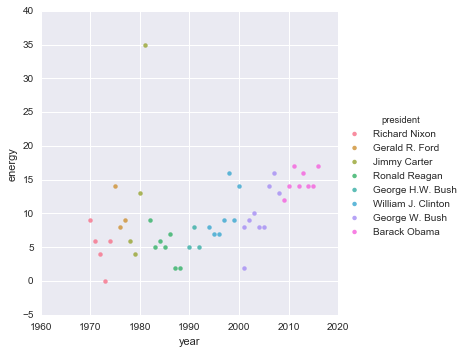

In [25]:
sb.lmplot('year', 'energy', data=df, hue='president', fit_reg=False)

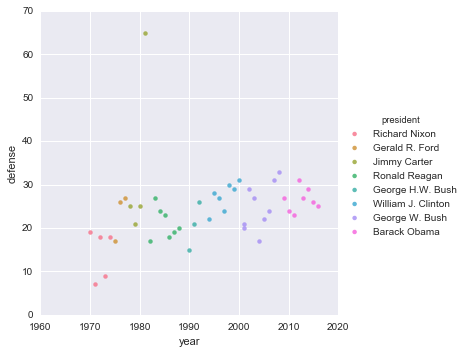

In [26]:
sb.lmplot('year', 'defense', data=df, hue='president', fit_reg=False)

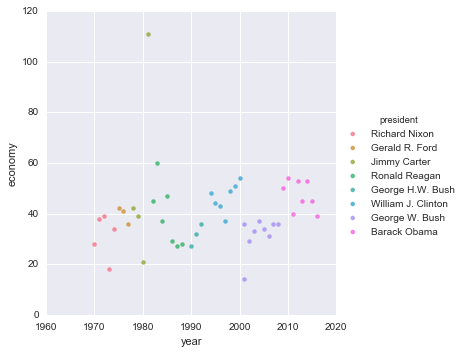

In [27]:
sb.lmplot('year', 'economy', data=df, hue='president', fit_reg=False)

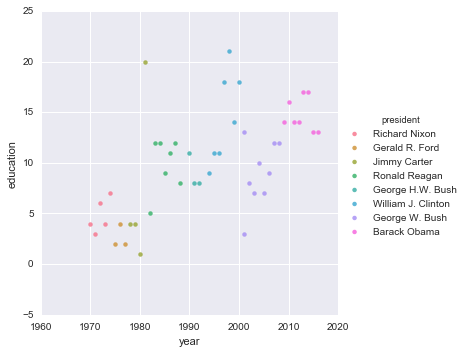

In [29]:
sb.lmplot('year', 'education', data=df, hue='president', fit_reg=False)

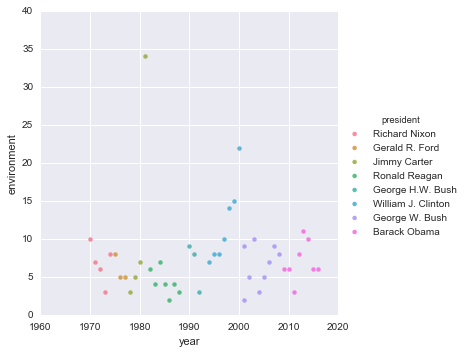

In [30]:
sb.lmplot('year', 'environment', data=df, hue='president', fit_reg=False)

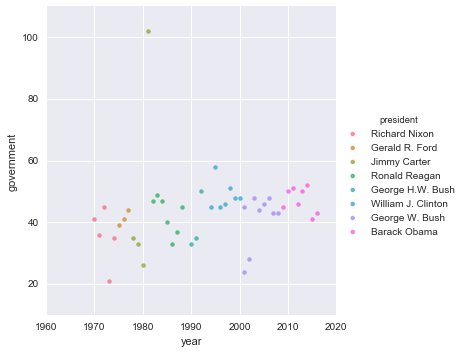

In [31]:
sb.lmplot('year', 'government', data=df, hue='president', fit_reg=False)

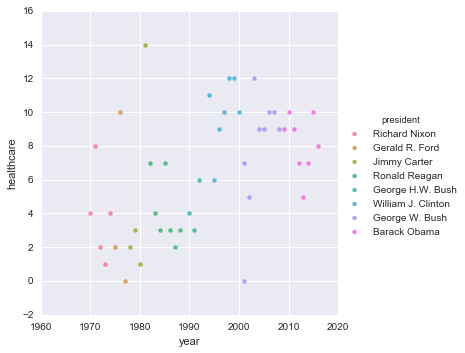

In [33]:
sb.lmplot('year', 'healthcare', data=df, hue='president', fit_reg=False)

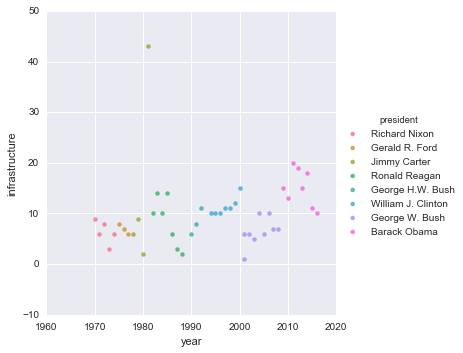

In [34]:
sb.lmplot('year', 'infrastructure', data=df, hue='president', fit_reg=False)

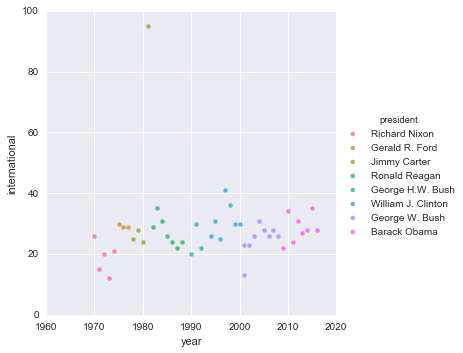

In [35]:
sb.lmplot('year', 'international', data=df, hue='president', fit_reg=False)

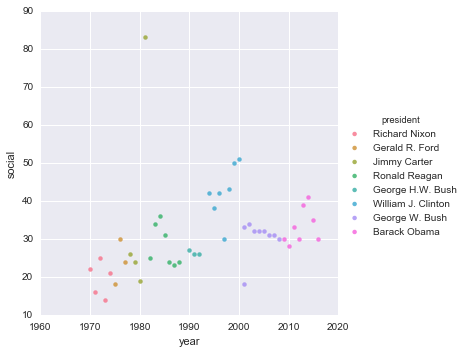

In [36]:
sb.lmplot('year', 'social', data=df, hue='president', fit_reg=False)